In [2]:
import numpy as np
from selenium import webdriver
import time
import pandas as pd

In [3]:
browser = webdriver.Firefox()
browser.get('https://www.google.com/search?channel=fs&client=ubuntu&q=numeri+casuali')
time.sleep(10)
# do il tempo di cliccare continua

In [4]:
#imposto i valori
minimo = 1
massimo =23
volte = 50

min = browser.find_element_by_id('UMy8j')
min.clear()
min.send_keys(minimo)
max = browser.find_element_by_id('nU5Yvb')
max.clear()
max.send_keys(massimo)

In [5]:
# con un ciclo faccio n volte l'estrazione
genera = browser.find_element_by_id('ZdzlKb')
ris = browser.find_element_by_class_name('gws-csf-randomnumber__result')
numeri=[]
for i in range(volte): 
    genera.click()
    time.sleep(0.5)
    numeri.append(int(ris.text))

#print(numeri)

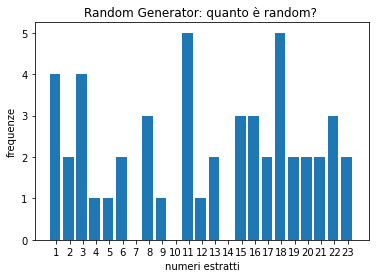

In [39]:
# a questo punto ho un array con tutti i risultati
numero_numeri = massimo-minimo

import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
plt.hist(numeri,numero_numeri+1,range =(minimo,massimo+1), width=0.8 ,align='left')

plt.xticks([k for k in range(minimo,massimo+1)])

plt.title('Random Generator: quanto è random? ')
plt.xlabel('numeri estratti')
plt.ylabel('frequenze')
plt.show()

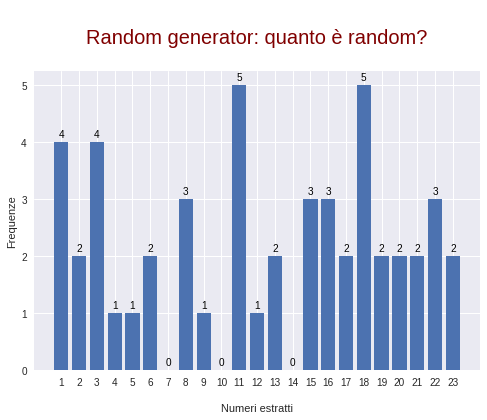

In [59]:
x = np.arange(minimo,massimo +1) # per distanziare colonne
width = 0.8 #larghezza delle colonne

frequenze = [] #array delle frequenze
for i in range(minimo,massimo+1):
    frequenze.append(numeri.count(i))

mpl.style.use('seaborn')
fig, ax = plt.subplots()
rects = ax.bar(x, frequenze , width, label='frequenze')


ax.set_title('\nRandom generator: quanto è random?\n',c = 'maroon', size = 20.0)
ax.set_ylabel('Frequenze')
ax.set_xlabel('\nNumeri estratti')
ax.set_xticks(x)

#setting colors
mpl.rcParams['text.color'] = 'black'
mpl.rcParams['xtick.color'] = 'gray'
mpl.rcParams['ytick.color'] = 'gray'
mpl.rcParams['axes.labelcolor'] = 'red'

for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width()/2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')



plt.show()
